In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
df.shape

(1000, 8)

In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df.rename(columns = lambda column:'_'.join(column.title().split()), inplace = True)

In [13]:
df

,Gender,Race/Ethnicity,Parental_Level_Of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [15]:
for col in df:
    print(df[col].name.center(50))
    print(df[col].value_counts())

                      Gender                      
female    518
male      482
Name: Gender, dtype: int64
                  Race/Ethnicity                  
group C    319
group D    262
group B    190
group E    140
group A     89
Name: Race/Ethnicity, dtype: int64
           Parental_Level_Of_Education            
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: Parental_Level_Of_Education, dtype: int64
                      Lunch                       
standard        645
free/reduced    355
Name: Lunch, dtype: int64
             Test_Preparation_Course              
none         642
completed    358
Name: Test_Preparation_Course, dtype: int64
                    Math_Score                    
65    36
62    35
59    32
69    32
73    27
      ..
22     1
19     1
18     1
8      1
0      1
Name: Math_Score, Length: 81, dtype: int64
                  Reading_Score        

In [17]:
exams = df.columns[-3:].to_list()

In [18]:
exams

['Math_Score', 'Reading_Score', 'Writing_Score']

In [26]:
df.isnull().sum()/df.shape[0]*100

Gender                         0.0
Race/Ethnicity                 0.0
Parental_Level_Of_Education    0.0
Lunch                          0.0
Test_Preparation_Course        0.0
Math_Score                     0.0
Reading_Score                  0.0
Writing_Score                  0.0
dtype: float64

In [27]:
df.describe()

,Math_Score,Reading_Score,Writing_Score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [42]:
gender=df.groupby('Gender')

In [43]:
metrics = [np.mean, np.median, np.var, np.std]


In [46]:
gender[exams].agg(metrics).T

Gender                    female        male
Math_Score    mean     63.633205   68.728216
              median   65.000000   69.000000
              var     239.985124  206.102695
              std      15.491453   14.356277
Reading_Score mean     72.608108   65.473029
              median   73.000000   66.000000
              var     206.733938  194.095945
              std      14.378245   13.931832
Writing_Score mean     72.467181   63.311203
              median   74.000000   64.000000
              var     220.369327  199.200248
              std      14.844842   14.113832

In [48]:
df.groupby('Gender').agg([np.mean, np.median, np.var, np.std]).T

Gender                    female        male
Math_Score    mean     63.633205   68.728216
              median   65.000000   69.000000
              var     239.985124  206.102695
              std      15.491453   14.356277
Reading_Score mean     72.608108   65.473029
              median   73.000000   66.000000
              var     206.733938  194.095945
              std      14.378245   13.931832
Writing_Score mean     72.467181   63.311203
              median   74.000000   64.000000
              var     220.369327  199.200248
              std      14.844842   14.113832

In [54]:
df.groupby(['Gender', 'Test_Preparation_Course'])[exams].agg(metrics).T


Gender                       female                    male            
Test_Preparation_Course   completed        none   completed        none
Math_Score    mean        67.195652   61.670659   72.339080   66.688312
              median      67.000000   62.000000   73.000000   67.000000
              var        202.901402  250.209527  202.260082  197.374847
              std         14.244346   15.818013   14.221817   14.049016
Reading_Score mean        77.375000   69.982036   70.212644   62.795455
              median      78.000000   71.000000   71.000000   63.000000
              var        161.175546  212.918595  186.827354  178.899393
              std         12.695493   14.591730   13.668480   13.375328
Writing_Score mean        78.793478   68.982036   69.793103   59.649351
              median      79.000000   70.000000   70.000000   60.000000
              var        149.836897  225.495172  168.800877  179.713778
              std         12.240788   15.016497   12.992339   13.405737

In [55]:
df.groupby(['Gender', 'Test_Preparation_Course']).agg(metrics).T


Gender                       female                    male            
Test_Preparation_Course   completed        none   completed        none
Math_Score    mean        67.195652   61.670659   72.339080   66.688312
              median      67.000000   62.000000   73.000000   67.000000
              var        202.901402  250.209527  202.260082  197.374847
              std         14.244346   15.818013   14.221817   14.049016
Reading_Score mean        77.375000   69.982036   70.212644   62.795455
              median      78.000000   71.000000   71.000000   63.000000
              var        161.175546  212.918595  186.827354  178.899393
              std         12.695493   14.591730   13.668480   13.375328
Writing_Score mean        78.793478   68.982036   69.793103   59.649351
              median      79.000000   70.000000   70.000000   60.000000
              var        149.836897  225.495172  168.800877  179.713778
              std         12.240788   15.016497   12.992339   13.405737

In [67]:
df.groupby(['Race/Ethnicity','Parental_Level_Of_Education']).mean()

Math_Score  Reading_Score  \
Race/Ethnicity Parental_Level_Of_Education                              
group A        associate's degree            61.000000      67.071429   
               bachelor's degree             67.166667      68.083333   
               high school                   60.444444      62.888889   
               master's degree               57.666667      64.666667   
               some college                  63.888889      65.777778   
               some high school              58.916667      62.083333   
group B        associate's degree            66.097561      69.585366   
               bachelor's degree             69.300000      72.950000   
               high school                   59.791667      63.458333   
               master's degree               67.166667      80.166667   
               some college                  63.189189      65.756757   
               some high school              61.815789      66.447368   
group C        associate's degree            66.730769      71.128205   
               bachelor's degree             68.150000      75.675000   
               high school                   60.906250      64.421875   
               master's degree               67.052632      70.526316   
               some college                  65.130435      69.420290   
               some high school              60.551020      65.632653   
group D        associate's degree            67.600000      70.540000   
               bachelor's degree             67.571429      70.142857   
               high school                   62.863636      64.409091   
               master's degree               72.521739      77.173913   
               some college                  68.731343      70.880597   
               some high school              66.760000      69.980000   
group E        associate's degree            74.897436      73.820513   
               bachelor's degree             76.555556      74.833333   
               high school                   70.772727      70.318182   
               master's degree               74.625000      82.125000   
               some college                  73.828571      72.628571   
               some high school              72.111111      69.555556   

                                            Writing_Score  
Race/Ethnicity Parental_Level_Of_Education                 
group A        associate's degree               63.571429  
               bachelor's degree                68.333333  
               high school                      60.500000  
               master's degree                  67.666667  
               some college                     65.000000  
               some high school                 58.583333  
group B        associate's degree               68.243902  
               bachelor's degree                71.650000  
               high school                      61.250000  
               master's degree                  77.166667  
               some college                     64.189189  
               some high school                 64.605263  
group C        associate's degree               70.269231  
               bachelor's degree                75.900000  
               high school                      61.656250  
               master's degree                  69.526316  
               some college                     68.869565  
               some high school                 63.285714  
group D        associate's degree               69.860000  
               bachelor's degree                71.892857  
               high school                      63.159091  
               master's degree                  79.739130  
               some college                     71.701493  
               some high school                 69.100000  
group E        associate's degree               73.205128  
               bachelor's degree                75.388889  
               high school 

In [70]:
genderra=df.Gender.value_counts()

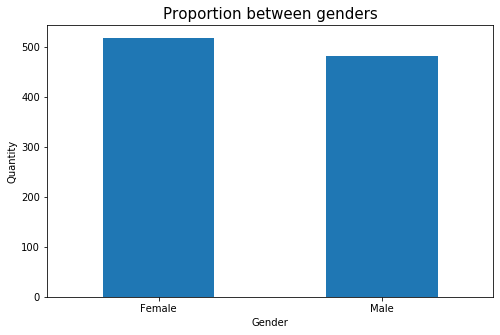

In [74]:
df['Gender'].value_counts().plot(kind = 'bar', figsize = (8, 5))
plt.title('Proportion between genders', fontsize= 15)
plt.xlabel('Gender')
plt.xticks([0, 1], ['Female', 'Male'], rotation = 0)
plt.ylabel('Quantity')
plt.xlabel('Gender')
plt.show()

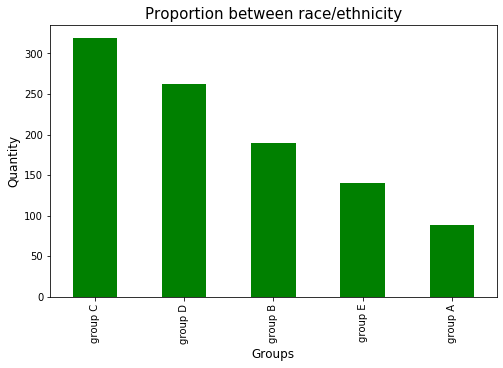

In [17]:

df['race/ethnicity'].value_counts().plot(kind = 'bar', figsize = (8, 5),color='g')
plt.title('Proportion between race/ethnicity', fontsize= 15)
plt.ylabel('Quantity',fontsize=12)
plt.xlabel('Groups',fontsize=12)
plt.show()

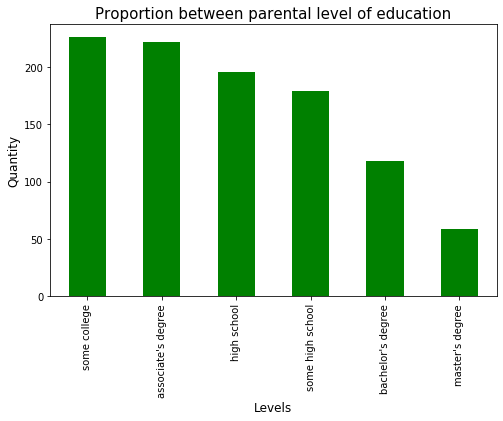

In [20]:

df['parental level of education'].value_counts().plot(kind = 'bar', figsize = (8, 5),color='g')
plt.title('Proportion between parental level of education', fontsize= 15)
plt.ylabel('Quantity',fontsize=12)
plt.xlabel('Levels',fontsize=12)
plt.show()

In [21]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


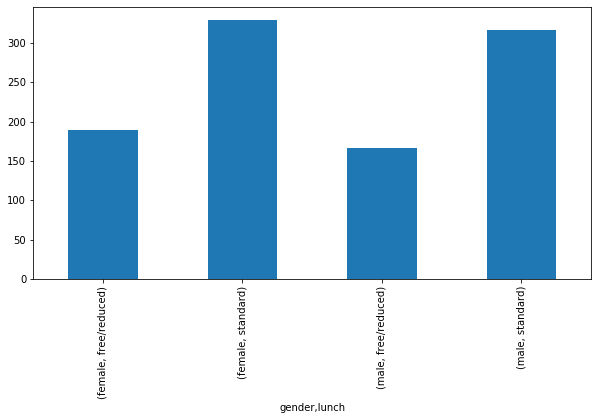

In [37]:
df.groupby(['gender','lunch']).size().plot.bar(figsize=(10,5))

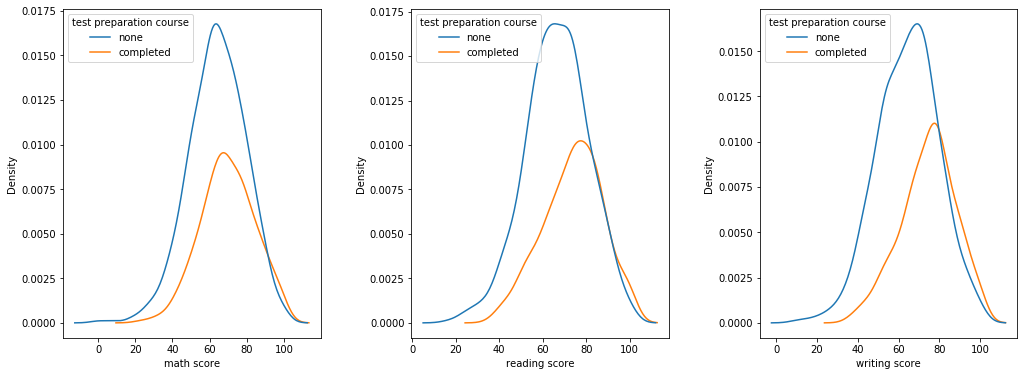

In [39]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols = 3, figsize = (15,6))

sns.kdeplot(data = df, x = 'math score', hue = 'test preparation course', ax = ax0)
ax0.set_xlabel('math score')

sns.kdeplot(data = df, x = 'reading score', hue = 'test preparation course', ax = ax1)
ax1.set_xlabel('reading score')

sns.kdeplot(data = df, x = 'writing score', hue = 'test preparation course', ax = ax2)
ax2.set_xlabel('writing score')

plt.tight_layout(pad = 3.5)

In [40]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [41]:
df.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


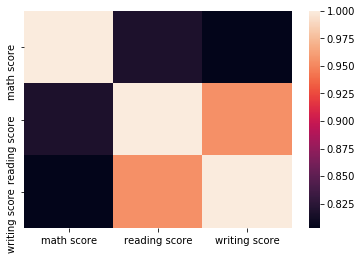

In [42]:
sns.heatmap(df.corr())

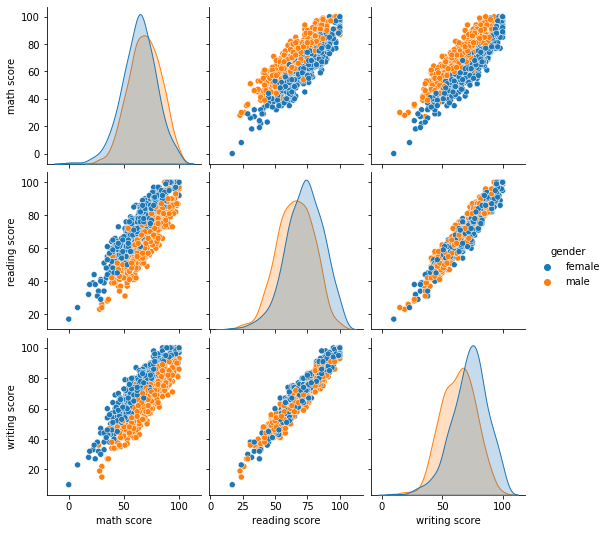

In [48]:
sns.pairplot(data=df,hue='gender')

TypeError: get_group() missing 1 required positional argument: 'name'